In [1]:
import matplotlib.pyplot as plt
import numpy as np
import platform
import Slope_Regression as sr
import SIRD_Model as sird

### Calculate Slope of Infection Data Using Regression

/home/holiday/Documents/School/Stewart/COVID-Tracking-Biola-Summer/Code/Slope_Regression.py:15: RuntimeWarning: divide by zero encountered in log
  point_slope, res, _, _ = np.linalg.lstsq(timeArray, np.log(pointArray), rcond=None)
<ipython-input-2-092811951be7>:38: RuntimeWarning: divide by zero encountered in true_divide
  beta[:] = (slopes[:]*((q*population+current_infected[half_window:-half_window+1]-infected[half_window:-half_window+1])


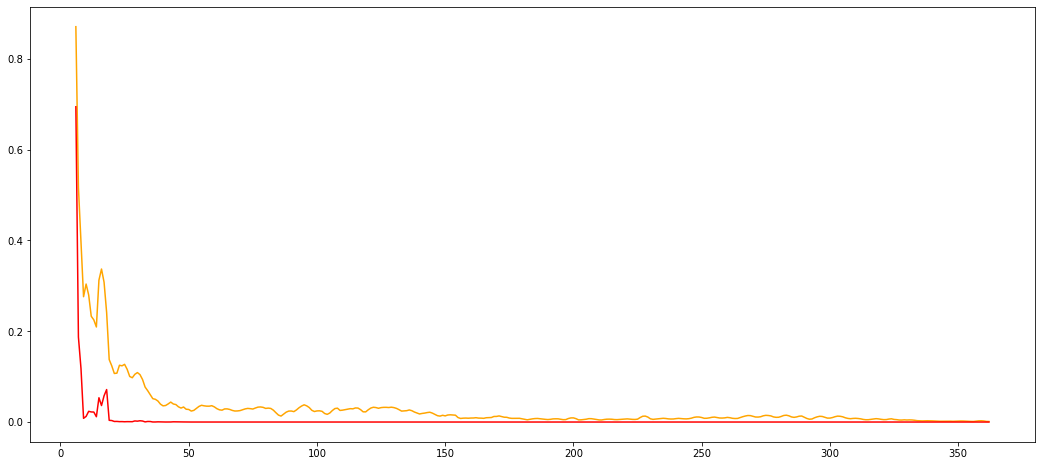

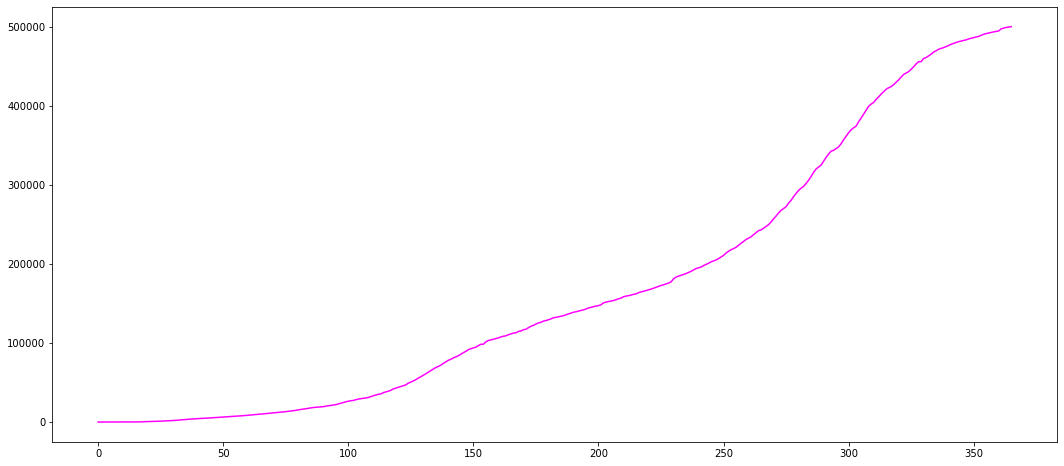

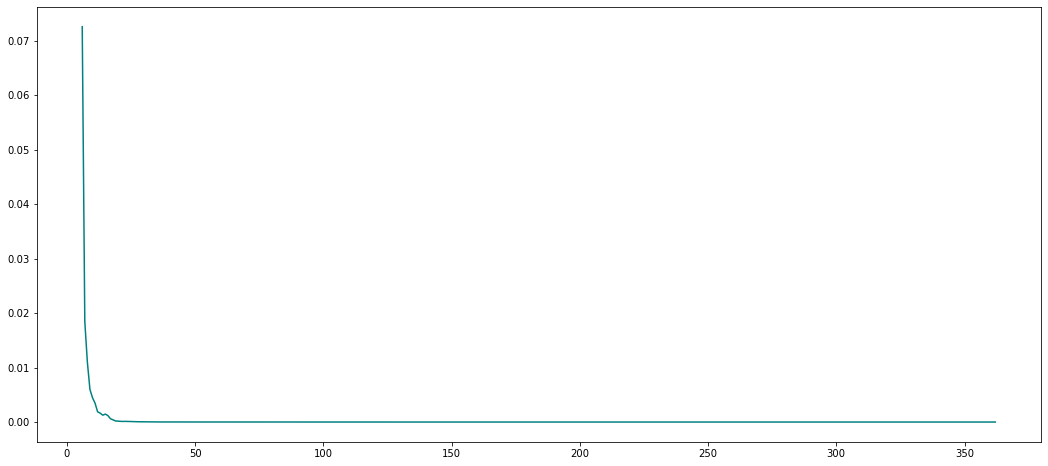

In [2]:

def showRegression(region, window, dir_path="../Data/Covid Tracking State Data/"):
    # modify the path syntax based on the current platform
    if platform.system() == "Windows":
        dir_path.replace("/", "\\")
        
    _, infected, _, _ = sird.loadData("{}{}.csv".format(dir_path, region))
    
    infected = np.array(infected)
    ln_infected = np.log(infected)

    slopes, errs = sr.regressionSlopeSeries(infected, window)
    
    fig, ax = plt.subplots(figsize=(18,8))
    ax.plot(slopes, color="orange", label="Infected Slope")
    ax.plot(errs, color="red", label="Residual")
    fig2, ax2 = plt.subplots(figsize=(18,8))
    ax2.plot(infected, color="magenta", label="Infected")
    fig3, ax3 = plt.subplots(figsize=(18,8))
    ax3.plot(ln_infected, color="teal", label="Log Infected")
    
def showBeta(region, q, population, window, dir_path="../Data/Covid Tracking State Data/"):
     # modify the path syntax based on the current platform
    if platform.system() == "Windows":
        dir_path.replace("/", "\\")
        
    dates, infected, recovered, deaths = sird.loadData("{}{}.csv".format(dir_path, region))
    infected = np.array(infected)
    recovered = np.array(recovered)
    deaths = np.array(deaths)
    
    slopes, errs = sr.regressionSlopeSeries(infected, window)
    
    half_window = window//2
    
    beta = np.zeros(len(slopes))
    current_infected = np.zeros(len(infected))
    current_infected[:] = infected[:]-recovered[:]-deaths[:]
    beta[:] = (slopes[:]*((q*population+current_infected[half_window:-half_window+1]-infected[half_window:-half_window+1])
                         /(current_infected[half_window:-half_window+1]*(q*population-infected[half_window:-half_window+1]))))
    
    fig, ax = plt.subplots(figsize=(18,8))
    ax.plot(slopes, color="orange", label="Infected Slope")
    ax.plot(errs, color="red", label="Residual")
    fig2, ax2 = plt.subplots(figsize=(18,8))
    ax2.plot(infected, color="magenta", label="Infected")
    fig3, ax3 = plt.subplots(figsize=(18,8))
    ax3.plot(beta, color="teal", label="Beta")
    

# showRegression("Lombardia", 5, "../Data/Italian Data/")
showBeta("AL", 15, 4900000, 4)
